In [1]:
# essentials
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

# tensorflow tools
from keras.preprocessing import image

In [2]:
# Filepaths to training and test sets
base_dir = './data/fruits-360_dataset/fruits-360'

train_filepaths = list(Path(base_dir + '/Training').glob(r'**/*.jpg'))
test_filepaths = list(Path(base_dir + '/Test').glob(r'**/*.jpg'))

In [3]:
# Obtaining labels from filepaths function
def get_fruit_label(filepaths):
    labels = [str(filepath).split('\\')[-2] for filepath in filepaths]

    filepaths = pd.Series(filepaths, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    fruits_df = pd.concat([filepaths, labels], axis=1)

    return fruits_df

In [4]:
# Creating datasets with image filepaths and corresponding labels
train_df = get_fruit_label(train_filepaths)
test_df = get_fruit_label(test_filepaths)

In [5]:
# Getting a list of labels
label_list = train_df.Label.unique().tolist()
print(label_list)

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melo

In [6]:
# Paths to chosen apple images
dir_apple_golden_3 = base_dir + '/Training/Apple Golden 3'
dir_apple_golden_2 = base_dir + '/Training/Apple Golden 2'

apple_golden_3 = plt.imread(dir_apple_golden_3  + '/10_100.jpg')
apple_golden_2 = plt.imread(dir_apple_golden_2 + '/0_100.jpg')

Text(0.5, 1.0, 'Apple golden 2')

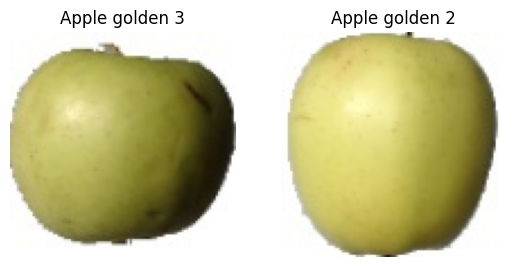

In [7]:
# Plotting selected apples
fig, axs = plt.subplots(1,2)

axs[0].imshow(apple_golden_3)
axs[0].axis('off')
axs[0].set_title("Apple golden 3")

axs[1].imshow(apple_golden_2)
axs[1].axis('off')
axs[1].set_title("Apple golden 2")

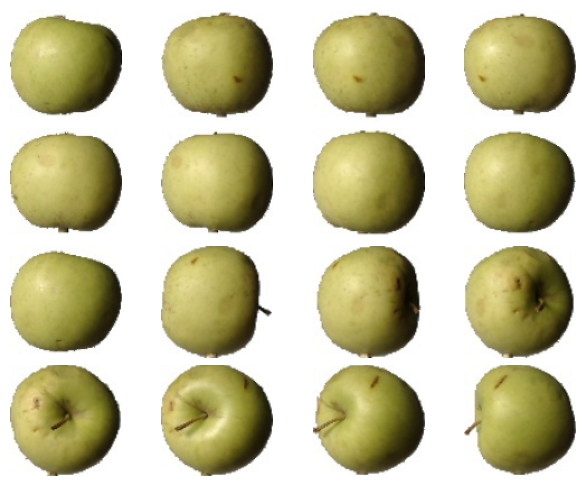

In [8]:
# Displaying different angles
fig, axs = plt.subplots(4,4)

apple_golden_3_filenames = os.listdir(dir_apple_golden_3)

for i, ax in enumerate(axs.flat):
    image_path = dir_apple_golden_3 + "/" + apple_golden_3_filenames[i*28]
    img = plt.imread(image_path)
    ax.imshow(img)
    ax.axis('off')
    
plt.tight_layout(pad=0.5)

In [9]:
# Fixed parameters
image_size = (224, 224, 3)
batch_size = 32
num_classes = len(label_list)

In [10]:
# Displaying the number of labels
num_classes

131

In [11]:
# Creating data generators for augmented and true image sets
augmented_datagen = image.ImageDataGenerator(
    rotation_range=180,
    shear_range=10,
    horizontal_flip=True,
    vertical_flip=True
)

true_datagen = image.ImageDataGenerator()

In [12]:
augmented_gen = augmented_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    target_size=image_size[:-1]
)

true_gen = true_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    target_size=image_size[:-1]
)

Found 67692 validated image filenames belonging to 131 classes.
Found 67692 validated image filenames belonging to 131 classes.


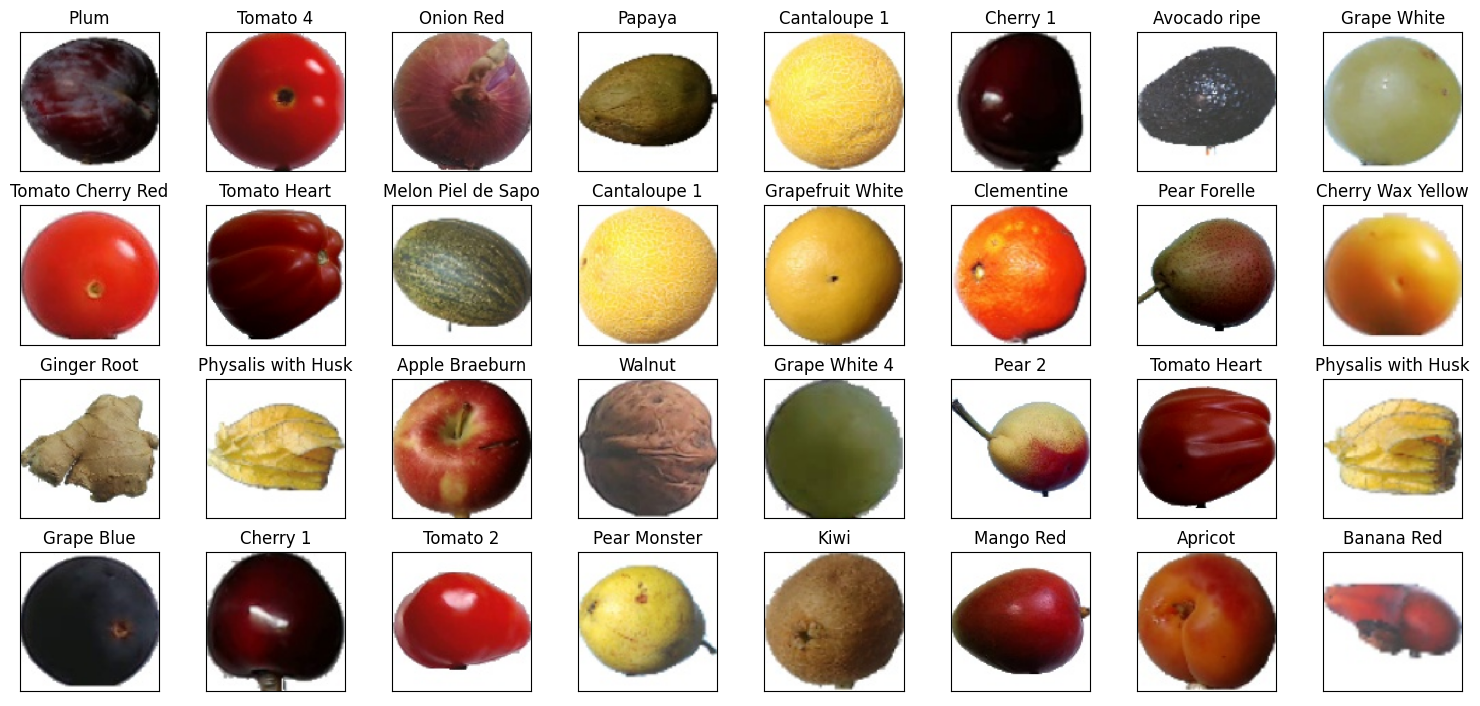

In [13]:
# Displaying a sample of true images
X_sample, y_sample = true_gen.next()

fig, axes = plt.subplots(4, 8, figsize=(15, 7), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(X_sample[i] / 255.)
    ax.set_title(label_list[np.argmax(y_sample[i])])
plt.tight_layout(pad=0.5)
plt.show()

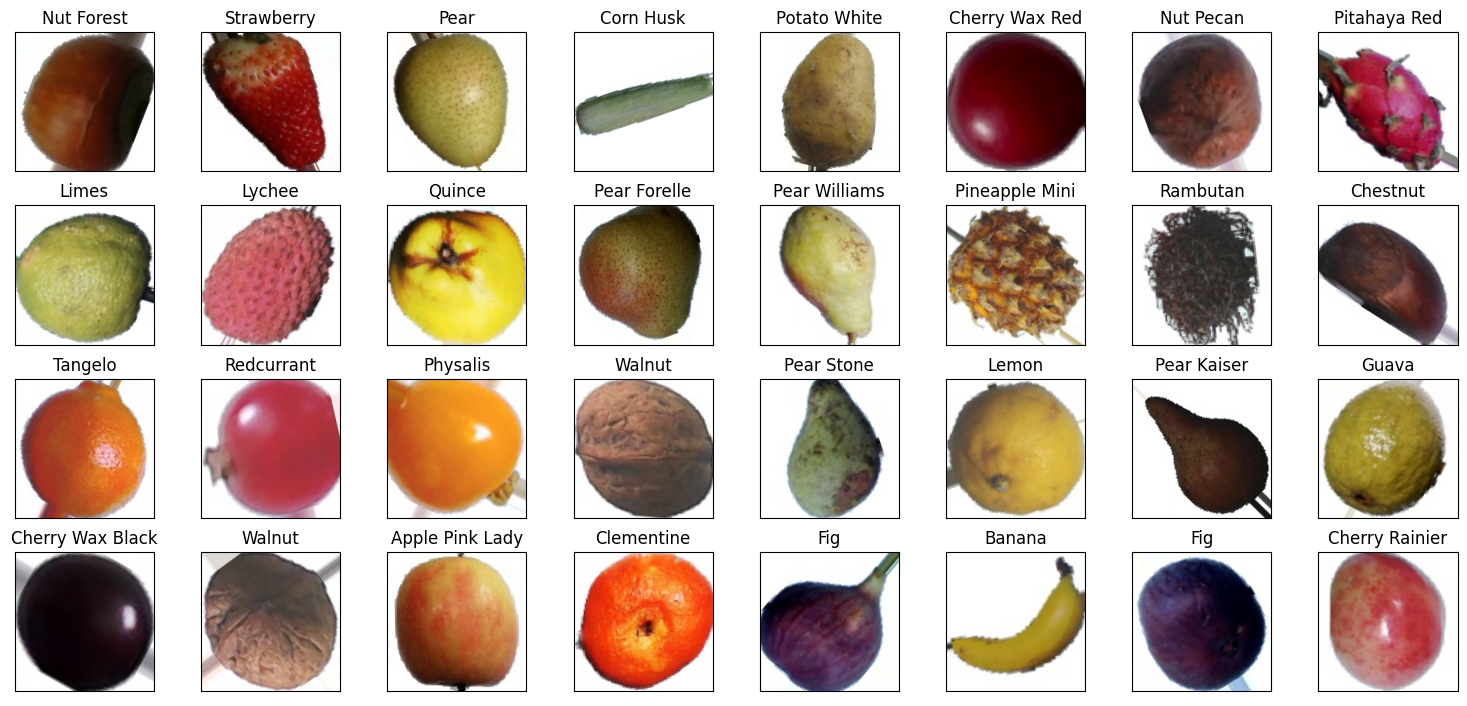

In [14]:
# Displaying a sample of augmented images
X_sample, y_sample = augmented_gen.next()

fig, axes = plt.subplots(4, 8, figsize=(15, 7), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(X_sample[i] / 255.)
    ax.set_title(label_list[np.argmax(y_sample[i])])
plt.tight_layout(pad=0.5)
plt.show()

<AxesSubplot: title={'center': 'Number of images for each label in the training set'}>

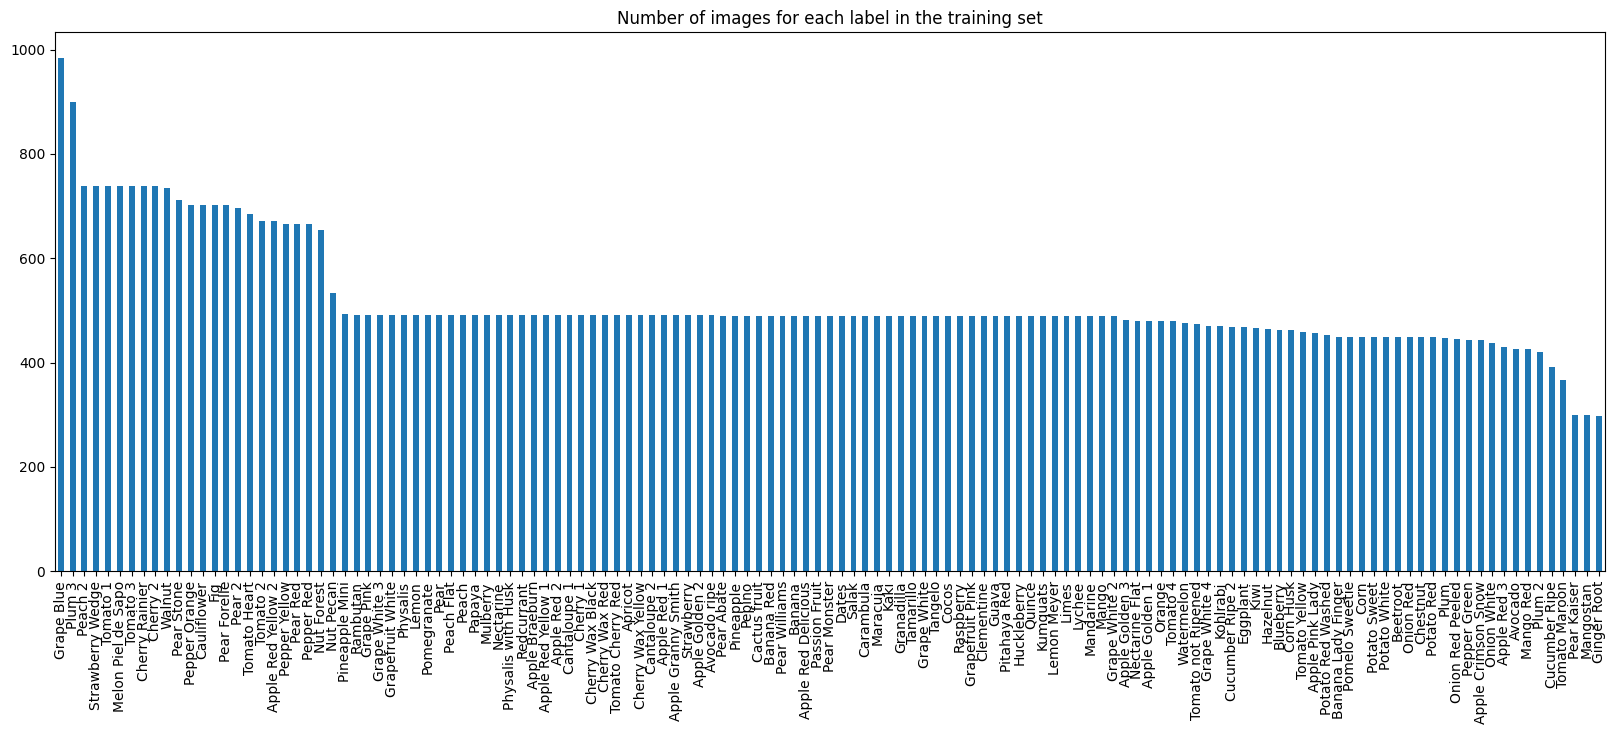

In [15]:
# Displaying the image distribution in the Training set
train_df.Label.value_counts().plot(kind='bar', title='Number of images for each label in the training set', figsize=(20, 7))

<AxesSubplot: title={'center': 'Number of images for each label in the Test set'}>

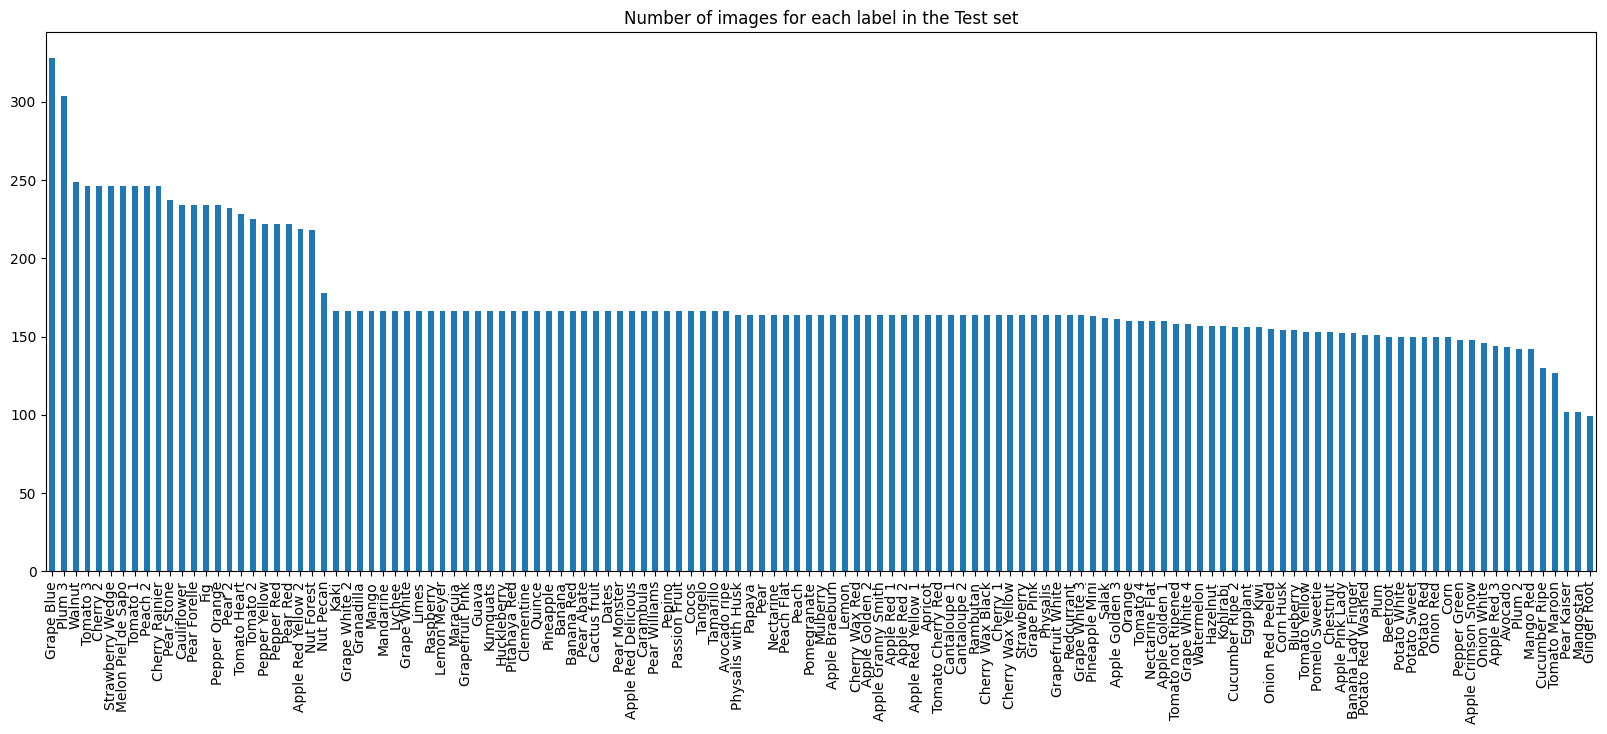

In [16]:
# Displaying the image distribution in the Test set
test_df.Label.value_counts().plot(kind='bar', title='Number of images for each label in the Test set', figsize=(20, 7))